# Solutions - Homework 2

## Markets Foundations

### UChicago Financial Mathematics

#### September 2023

* Mark Hendricks
* hendricks@uchicago.edu

#### This assignment is not submitted, graded, or for credit. 
Rather, it is assigned for learning purposes.

***

# 1 Money Market Rates

Use the data in `data/ref_rates.xlsx` to explore several key money-market rates.
* SOFR
* Fed funds
* 3-month T-bill yield


## 1.1
Plot the time series.

## 1.2
Calculate the correlation between the three rates (filtering to the dates for which they all have reported values.)

Do this correlation analysis for the data in
* levels (as provided)
* differences (day-over-day changes)

# <span style="color:red">Solution 1</span>

In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 13

from matplotlib.ticker import (MultipleLocator,
                               FormatStrFormatter,
                               AutoMinorLocator)
import sys
sys.path.insert(0, '../cmds')
#from treasury_cmds 
from ratecurves import price_bond

In [2]:
filepath = '../data/ref_rates.xlsx'
refs = pd.read_excel(filepath, sheet_name='data').set_index('date')

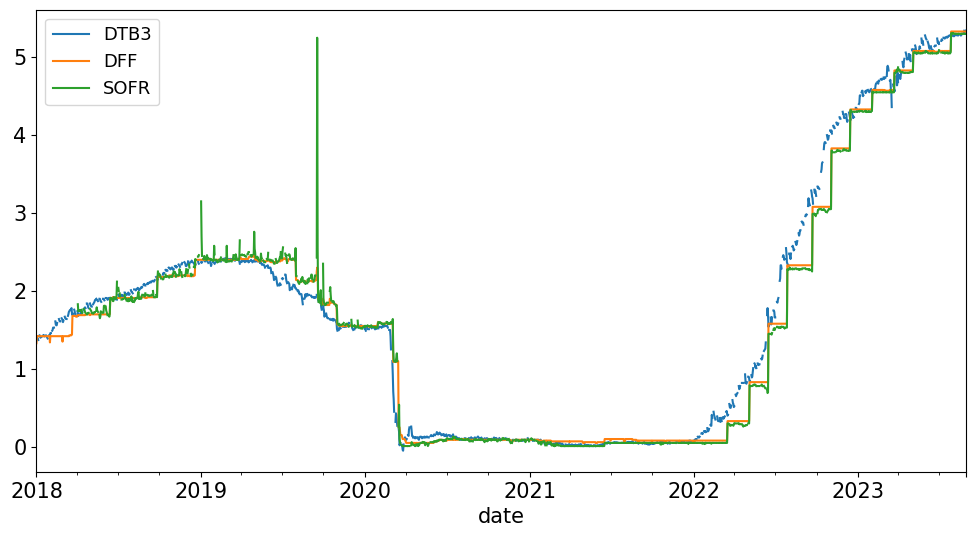

In [3]:
refs.plot();

#### <span style="color:red">Correlation of the **levels**.</span>

In [4]:
refs.corr().style.format('{:.2%}')

,DTB3,DFF,SOFR
DTB3,100.00%,99.18%,98.87%
DFF,99.18%,100.00%,99.82%
SOFR,98.87%,99.82%,100.00%


#### <span style="color:red">Correlation of the day-over-day **changes**.</span>

In [5]:
refs.diff().corr().style.format('{:.2%}')

,DTB3,DFF,SOFR
DTB3,100.00%,-0.92%,3.79%
DFF,-0.92%,100.00%,45.94%
SOFR,3.79%,45.94%,100.00%


***

# 2. Discounting and Cashflows

Consider the treasuries listed in `'../data/selected_treasury_rates.xlsx.` Suppose the date of our analysis is `June 30, 2023`.

Note:
* For our purposes, consider the maturities to be exact 6-month intervals.

## 2.1
Price the treasuries.
* Ignore the provided market quote in the data, and use the price formula, (as a function of ytm,) to get the theoretical price.
* Note that this will **not** match the market quoted prices in the data due to a few simplifications made.

## 2.2
Suppose that for each treasury, both the YTM and coupon rate increase by 0.5\%. 
* What is the revised price of the treasuries? 
* How do they compare to the theoretical prices of 2.1? Is this a surprise?

# <span style="color:red">Solution 2</span>

In [6]:
filepath = '../data/selected_treasury_rates.xlsx'
rawdata = pd.read_excel(filepath, sheet_name='data').set_index('KYTREASNO')
quotes = rawdata.copy()
quotes['maturity'] = rawdata['maturity']

In [7]:
ADJ = 0

FREQcpns = 2

comp = quotes.copy()[['price']]

for i, bond in enumerate(comp.index):
    ytm = quotes.loc[bond,'ytm']
    cpn = quotes.loc[bond,'coupon rate']/100
    T = (FREQcpns * quotes.loc[bond,'maturity']).round() / FREQcpns
    comp.loc[bond,'theoretical price'] = price_bond(ytm,T,cpn)
    comp.loc[bond,'adjusted price'] = price_bond(ytm+ADJ,T,cpn+ADJ)

In [8]:
comp

,price,theoretical price,adjusted price
KYTREASNO,,,
207047,98.515625,101.125000,101.125000
207103,96.722656,96.803886,96.803886
207458,95.054688,92.798965,92.798965
207224,95.882812,96.005620,96.005620
207297,95.171875,97.529143,97.529143
207731,90.023438,90.162624,90.162624
207459,91.539062,89.767142,89.767142
207561,86.148438,86.311323,86.311323
207653,85.335938,87.315044,87.315044


### The revised price is nearly the exact same!

This illustrates the mechanics of price and yield:
* The change in interest rate impacts the discount AND the coupon.
* These two effects are *nearly* offsetting.

Thus, bonds with 
* coupon rates **lower** than the current YTM will be priced **below par** (face value)
* coupon rates **higher** than the current YTM will be priced **above par** (face value)